In [23]:
# initial setup
try:
    # settings colab:
    import google.colab
        
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.22.1 already installed
xlrd=1.2.0 already installed
plotly=4.6.0 already installed
chart-studio=1.1.0 already installed
plotly-orca=1.3.1 already installed
Running command `conda install --yes unicodedata2`... ok
Solving environment: ...working... done

# All requested packages already installed.


Importando librerías ...
Las librerías has sido importadas con éxito


In [24]:
data = pd.read_csv("properati.csv")

In [25]:
#CREAR COPIA DEL DATASET ORIGINAL
data_clean = data.copy(deep=True)

<hr id="Generales">

<h2 style="color: lightblue">GENERALES</h2>

In [26]:
print("cantidad de filas: " + str(data.shape[0]))
print("cantidad de columnas: " + str(data.shape[1]))

cantidad de filas: 121220
cantidad de columnas: 26


In [27]:
#Columnas String
columnas_str = ['operation', 'property_type', 'place_name', 'place_with_parent_names', 'country_name', 'state_name', 'description', 'title']

In [28]:
#Quitar espacios en blanco
for columna in columnas_str:
    data_clean[columna] = data_clean[columna].str.strip()

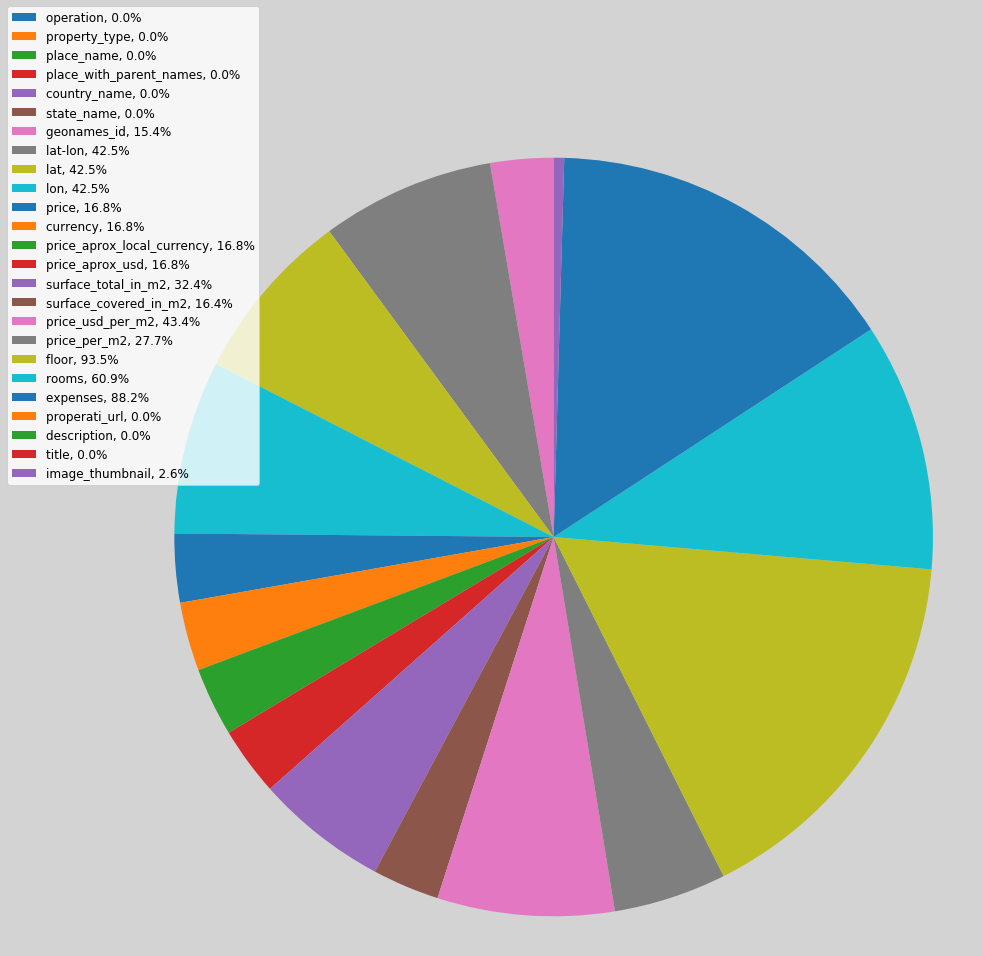

In [29]:
serieCantidadNulos = data_clean.isnull().sum()
dataCantidadNulos = { "Variable" : serieCantidadNulos.index[1:], "Cantidad" : serieCantidadNulos.values[1:]}
dfCantidadNulos = pd.DataFrame(dataCantidadNulos, columns=["Variable", "Cantidad"])

fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.pie(dfCantidadNulos.Cantidad.values, startangle=90)
ax1.axis('equal')
total = data_clean.shape[0]
labels = dfCantidadNulos.Variable.values

plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (s / total) * 100) for l, s in zip(labels, dfCantidadNulos.Cantidad.values)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

fig1.set_facecolor('lightgrey')
plt.show()

<br>
<div style="width: 100%; text-align: right"><a href="#Secciones"><img src="GoUp.png" style="height: 50px"></a></div>

<hr id="Operaciones">
<h2 style="color: lightblue">TIPOS DE OPERACIONES</h2>

In [30]:
#Expresión regular para buscar venta o alquiler
regex = re.compile("(venta)|(alquiler)", flags = re.IGNORECASE)

In [31]:
#Buscar Venta o Alquiler en description
regexOperacionesDescription = data_clean.description.apply(lambda x: regex.search(str(x)))
dfVentasDescription = regexOperacionesDescription.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasDescription[dfVentasDescription.notnull()].unique()
dfVentasDescription.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasDescription.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasDescription[dfVentasDescription.notnull()].unique()

#Crear columna Operacion
data_clean["Operacion_Description"] = dfVentasDescription
data_clean["Operacion_Description"].value_counts()

Venta       42336
Alquiler     1325
Name: Operacion_Description, dtype: int64

In [32]:
#Buscar Venta o Alquiler en title
regexOperacionesTitle = data_clean.title.apply(lambda x: regex.search(str(x)))
dfVentasTitle = regexOperacionesTitle.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasTitle[dfVentasTitle.notnull()].unique()
dfVentasTitle.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasTitle.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasTitle[dfVentasTitle.notnull()].unique()

#Crear columna Title
data_clean["Operacion_Title"] = dfVentasTitle
data_clean["Operacion_Title"].value_counts()

Venta       36131
Alquiler      217
Name: Operacion_Title, dtype: int64

In [33]:
#Buscar Venta o Alquiler en properati_url
regexOperacionesURL = data_clean.properati_url.apply(lambda x: regex.search(str(x)))
dfVentasURL = regexOperacionesURL.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasURL[dfVentasURL.notnull()].unique()
dfVentasURL.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasURL.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasURL[dfVentasURL.notnull()].unique()

#Crear columna URL
data_clean["Operacion_URL"] = dfVentasURL
data_clean["Operacion_URL"].value_counts()

Venta       121086
Alquiler       134
Name: Operacion_URL, dtype: int64

In [34]:
#Precios mínimos y máximos para alquiler
data_clean[data_clean.price_aprox_usd > 0].filter(items=["property_type", "price_aprox_usd"]).groupby(by="property_type").agg(['min', 'max'])

price_aprox_usd            
                          min         max
property_type                            
PH                    5047.53   2800000.0
apartment             4666.62  46545445.0
house                 5047.53  25000000.0
store                 4952.45  13000000.0

In [35]:
#Revisar los casos con precios menores a 10.000 para ver que no sean alquileres
data_clean[(data_clean.property_type == "house") & (data_clean.price_aprox_usd < 10000)].filter(items=["price_aprox_usd", "description"]).head(10)

,price_aprox_usd,description
7440,7010.45,"EXCELENTE CABAÑA 3 DORM, 2 BAÑOS, PARQUE, A 30..."
9665,9534.22,CODIGO: 7 ubicado en: Juana Manuela Gorritti -...
9761,0.00,Casa en Venta de 2 dorm. en Armenia
12372,8412.55,FRACCION DE TERRENO AL FONDOA SUBDIVIDIR. AL F...
16012,8412.55,"EXCELENTE ACCESO Y UBICACIÓN SUPERFICIE : 413,..."
19730,7963.88,Corredor Responsable: JORGE BECCO - CSI 5675Co...
28510,8749.92,Chalet en dos plantas. Barrio San Carlos. Vice...
40583,5776.61,CODIGO: 2347-453 ubicado en: villa carlos paz ...
47550,7571.29,CODIGO: 1520-MYR442248 ubicado en: General Paz...
104072,5047.53,"DOS DORMITORIOS, COCINA COMEDOR DIARIO, LIVING..."


In [36]:
#Revisar los casos con precios menores a 10.000 para ver que no sean alquileres
data_clean[(data_clean.property_type == "apartment") & (data_clean.price_aprox_usd < 10000)].filter(items=["price_aprox_usd", "description"]).head(10)

,price_aprox_usd,description
4399,5000.00,Corredor Responsable: Mauro Marvisi - CMCPSI 5...
6720,5608.31,BV Rondeau / Nancen: A metros del Shoping Port...
17731,5608.36,CODIGO: ubicado en: COOPERATIVA DE VIVIENDA R...
18705,5608.36,CODIGO: 85 ubicado en: mitre 100 - Publicado ...
19336,7851.71,Departamento de dos dormitorios con placard en...
20133,5103.61,CODIGO: 6375 ubicado en: Vera 1100 - Publicad...
21197,7583.27,SE OFRECE DEPARTAMENTO DE 2 DORMITORIOS EN BAR...
23142,7963.88,Corredor Responsable: Mariana Carrizo - CPCPI:...
23307,8973.38,Corredor Responsable: Caroline Hogner - CCI St...
26931,9500.00,Excelente Metros de Subte Lnea *A* Frente Sup...


In [37]:
#Revisar los casos con precios menores a 10.000 para ver que no sean alquileres
data_clean[(data_clean.property_type == "store") & (data_clean.price_aprox_usd < 10000)].filter(items=["price_aprox_usd", "description"]).head(10)

,price_aprox_usd,description
836,8412.55,"Venta de Negocio en Tolosa, La Plata116 entre..."
37594,6730.04,"Venta de puesto de diarios, excelente ubicació..."
40173,8244.30,"Fondo de comercio almacén/quiosco.En Galeria, ..."
40576,6231.51,CODIGO: 1834-024 ubicado en: LOCAL CENTRICO EN...
46687,8973.38,SE VENDE O SE ALQUILAN MAQUINAS + BANCOS - BA...
48004,8412.55,Fondo de comercio : De Indumentaria Femenina. ...
51890,8412.55,26 LOTES EXCEPCIONALES EN GENERAL RODRIGUEZ.PO...
56407,7500.00,"LOCALSARGENTO CABRAL 8, RAMOS MEJÍA. LOCAL DE ..."
56924,8412.55,Fondo de comercio : De Indumentaria Femenina. ...
58951,6231.51,CODIGO: 3122-VBB-019 ubicado en: Rondeau 201 -...


In [38]:
#Asignar "Fondo de Comercio"
regex = re.compile("venta de negocio|fondo de comercio", flags = re.IGNORECASE)
regexLocal = data_clean[(data_clean.property_type == "store")].description.apply(lambda x: regex.search(str(x)))
locales = regexLocal[regexLocal.notnull()].apply(lambda x: np.NaN if x is None else x.group(0))
data_clean.loc[locales.index, "property_type"] = "Fondo de Comercio"

In [39]:
data_clean.property_type.unique()

array(['PH', 'apartment', 'house', 'store', 'Fondo de Comercio'],
      dtype=object)

In [40]:
#property_type_dummies = pd.get_dummies(data_clean, columns=["property_type"], prefix="tipo_propiedad")
#data_clean = pd.concat([data_clean, property_type_dummies], axis=1)

In [41]:
data_clean.drop(
    ['Unnamed: 0'], \
    axis=1, inplace=True)

In [43]:
data_clean.to_csv("CleanCSV/Clean01_TipoOperacion.csv")